# p+ 固定方向和能量

- ../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/\*/\*.root
- 对比加入不同厚度液氢和液氘对能量、角度重建的影响

In [1]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

from single_pp_fixed_enery_and_direction_func import root2Df

## 1. 读入数据、拟合

In [2]:
def getSummary(root_path, kal=False):
    df_list = []
    index = []
    for d in os.listdir(root_path):
        index.append(float(d.split('_')[-1]))
        try:
            root_files = glob(os.path.join(root_path, d, '*.root'))       
            df_list.append(root2Df(root_files, kal=kal))
        except Exception as e:
            print(e)
            df_list.append(pd.Series([np.nan]*5))

    df = pd.concat(df_list, axis=1).T
    df.index = index
    df.columns = ['p_loc', 'p_scale', 'theta_loc', 'theta_scale', 'between_3_sigma']
    df = df.sort_index()

    return df
    

### 1.1 液氢

In [3]:
root_path = os.path.join(this_path, '../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_lh')

df_lh = getSummary(root_path, kal=False)
df_lh_kal = getSummary(root_path, kal=True)

z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_lh\0\0.root
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 10025.6] [loc=0.275 scale=0.003]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 102.135] [loc=1.471 scale=0.022]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_lh\15\0.root
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 9416.94] [loc=0.268 scale=0.003]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 161.476] [loc=1.471 scale=0.023]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_lh\10\0.root
[distfit] 

In [4]:
df_lh

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.274565,0.003067,1.470853,0.022391,969.0
5.0,0.272671,0.002870,1.471202,0.019973,972.0
10.0,0.270310,0.003654,1.472082,0.025841,970.0
15.0,0.268440,0.002950,1.471429,0.023203,966.0
20.0,0.266414,0.002906,1.471267,0.024269,965.0


In [5]:
df_lh_kal

,p_loc,p_scale,theta_loc,theta_scale,between_3_sigma
0.0,0.298506,0.006264,1.469978,0.023466,976.0
5.0,0.298753,0.005149,1.469648,0.022226,980.0
10.0,0.298739,0.008293,1.471054,0.025705,974.0
15.0,0.299167,0.003303,1.470391,0.024001,969.0
20.0,0.298569,0.006645,1.470112,0.027154,975.0


### 1.2 液氘

In [6]:
root_path = os.path.join(this_path, '../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_ld')

df_ld = getSummary(root_path, kal=False)
df_ld_kal = getSummary(root_path, kal=True)

z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_ld\0\0.root
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 10025.6] [loc=0.275 scale=0.003]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 102.135] [loc=1.471 scale=0.022]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_ld\15\0.root
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 9327.74] [loc=0.268 scale=0.003]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm] [0.00 sec] [RSS: 69.1038] [loc=1.473 scale=0.032]
[distfit] >Compute confidence interval [parametric]
z:\junofs\users\yuansc\bes3_add_layer\code\analyse\../../data/gen/single_p+/p_0.3_theta_0.1_phi_0.5/add_ld\10\0.root
[distfit] 

### 1.3 CsI

In [7]:
# root_path = os.path.join(this_path, '../../data/gen/single_p+_fixed_enery_and_direction/add_csi')

# df_csi = getSummary(root_path, kal=False)
# df_csi_kal = getSummary(root_path, kal=True)

## 2. 可视化

### 2.1 使用MDC track

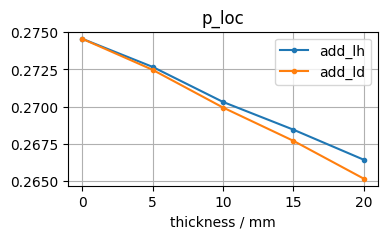

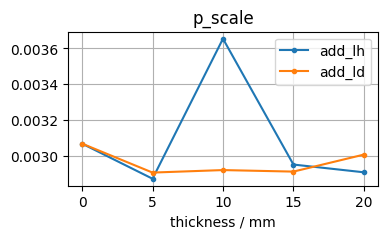

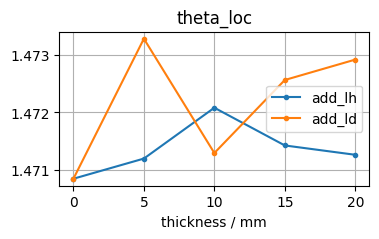

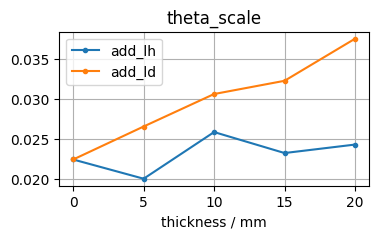

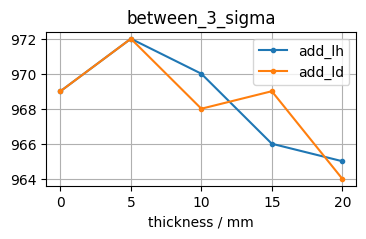

In [8]:
for column in df_lh.columns:
    tmp = pd.DataFrame({
        'add_lh': df_lh[column], 
        'add_ld': df_ld[column], 
        # 'add_csi': df_csi[column], 
    })
    tmp.plot(title=column, grid=True, figsize=(4,2), style='.-', xlabel='thickness / mm')
    plt.show()

### 2.2 使用kalman track

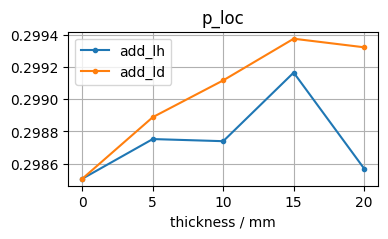

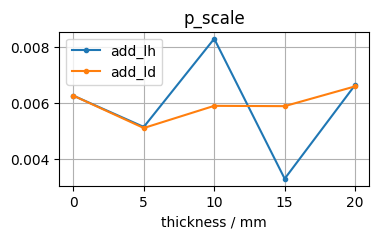

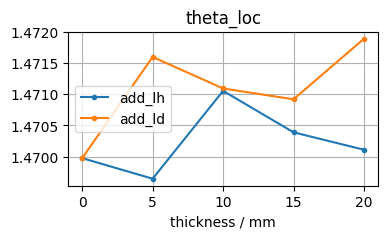

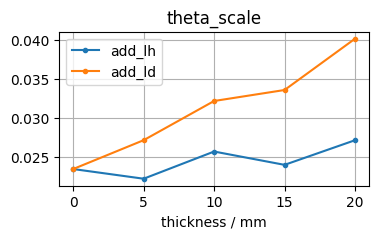

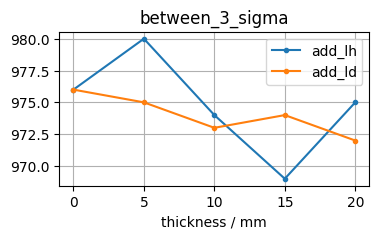

In [9]:
for column in df_lh_kal.columns:
    tmp = pd.DataFrame({
        'add_lh': df_lh_kal[column], 
        'add_ld': df_ld_kal[column], 
        # 'add_csi': df_csi_kal[column], 
    })
    tmp.plot(title=column, grid=True, figsize=(4,2), style='.-', xlabel='thickness / mm')
    plt.show()